<center>
<div style ="max-width:300px" 

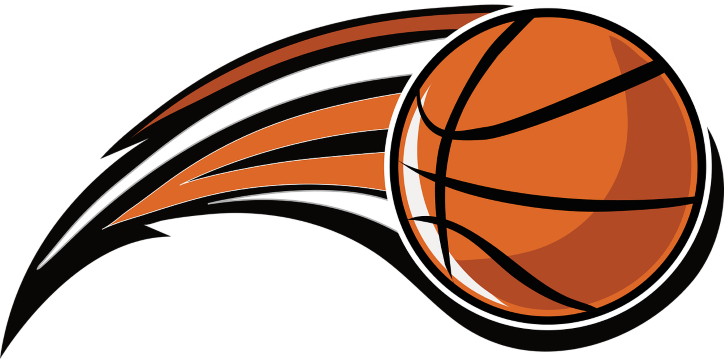

></div>
</center>

<center>

<div style="margin-top: 20px">
    <h2>Michael Jordan, Lebron James, or Kobe Bryant?</h2>
    <br>
    <text> A Comparative Study about Michael Jordan, Lebron James, and Kobe Bryant's NBA Point Distribution </text>
    <br>
    <br>
    <br>
    
    
    
</div>
<hr>
</center>

## Background of the Study

According to The Teal Mango, Basketball is the 3rd Most Popular Sport in the World with over 2.4Billion Followers, and NBA is without any doubt the best Professional BasketBall League.
<br><br>
Over the years, there have been a lot of discussion involving the three most popular basketball players (`Michael Jordan`, `Kobe Bryant`, `Lebron James`).<br>
Fans of each player keeps on arguing that the other one is better than the other two. <br>

With that, I came up with an idea to use Data Science to identify who among these three basketball players is the `BEST` in terms of `SCORING`

## Import Libraries

In [145]:
#data wrangling libraries

import pandas as pd
import numpy as np

#NBA API libraries
from nba_api.stats import endpoints
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

#statistical computing library
from scipy.stats import norm

#data visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt

#setting notebook display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))
#HTML("""
#<style>
#.output_png {
#    display: table-cell;
#    text-align: center;
#    vertical-align: middle;
#}
#</style>
#"")

print('Libraries imported successfully!')

Libraries imported successfully!


<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

 ## Player List from NBA API

In [2]:
#get the player list
players_list = players.get_players()

#convert the list to a dataframe
players = pd.DataFrame(players_list)

#display
players.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Local Functions to return Player ID and Point History from NBA API

In [3]:
#create a local function to return player ID based on the generated data from players.get_players() function of NBA API

def get_id(full_name = ''):
    id = players[players['full_name'] == full_name] #.reset_index(drop = True)
    id = id.iloc[0,0]
    
    return id


#create a local function to return each player's point history based on the generated data from playergamelog.PlayerGameLog() function of NBA API

def get_points(player_id = 0):
    gamelogs = playergamelog.PlayerGameLog(player_id,season = SeasonAll.all)
    gamelogs = gamelogs.get_data_frames()[0]
    
    columns = ['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS' ]
    
    gamelogs = gamelogs[columns]
    
    return gamelogs

<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Player ID

Data from `playergamelog` contains Player ID as the primary key, hence we need to determine each players' id to filter their respective point history

In [4]:
#get each players' ID

#Michael Jordan
mj_id = get_id('Michael Jordan')

#Kobe Bryant
kb_id = get_id('Kobe Bryant')

#Lebron James
lj_id = get_id('LeBron James')


<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Point History

In [5]:
#get each players' point history

#Michael Jordan
mj_points = get_points(mj_id)

#Kobe Bryant
kb_points = get_points(kb_id)

#Lebron James
lj_points = get_points(lj_id)

<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Data Processing

### Concatenate DataFrames

In [6]:
#concatenate the dataframe
goat = pd.concat([mj_points,lj_points,kb_points]).reset_index(drop = True)
goat

#create player name column
goat.insert(2, 'Player_Name', '')


#fill in Player_Name values based on Player_ID
for i, row in goat[['Player_ID', 'Player_Name']].iterrows():
    if goat.loc[i,'Player_ID'] == mj_id:
            goat.loc[i,'Player_Name'] = 'Michael Jordan'
    
    elif goat.loc[i,'Player_ID'] == lj_id:
            goat.loc[i,'Player_Name'] = 'LeBron James'
    
    else:
        goat.loc[i,'Player_Name'] = 'Kobe Bryant'

goat.head()

,SEASON_ID,Player_ID,Player_Name,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS
0,22002,893,Michael Jordan,0020201178,"APR 16, 2003",WAS @ PHI,L,28,15
1,22002,893,Michael Jordan,0020201164,"APR 14, 2003",WAS vs. NYK,L,38,21
2,22002,893,Michael Jordan,0020201150,"APR 12, 2003",WAS vs. ATL,L,30,17
3,22002,893,Michael Jordan,0020201140,"APR 11, 2003",WAS @ MIA,W,40,25
4,22002,893,Michael Jordan,0020201125,"APR 09, 2003",WAS vs. BOS,L,43,21


 ### Summarize the DataFrame

In [7]:
#create a groupby object to summarize the dataframe

summary = goat.groupby(['Player_Name']).agg({'SEASON_ID':pd.Series.nunique, 'Game_ID':pd.Series.nunique, 'MIN':np.mean, 'PTS':np.mean})
summary.rename(columns = {'SEASON_ID':'No. of Seasons', 'Game_ID':'No. of Games', 'MIN':'Average Game Time (minutes)', 'PTS':'Average Game Points' }, inplace = True)
summary

,No. of Seasons,No. of Games,Average Game Time (minutes),Average Game Points
Player_Name,,,,
Kobe Bryant,20,1346,36.137444,24.994799
LeBron James,19,1355,38.166052,27.058303
Michael Jordan,15,1072,38.267724,30.123134


<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Descriptive Statistics

### Numeric Variables

In [8]:
#describe the dataframe (numeric variables)

goat.groupby('Player_Name').describe()

Player_ID                                                       \
                   count    mean  std     min     25%     50%     75%     max   
Player_Name                                                                     
Kobe Bryant       1346.0   977.0  0.0   977.0   977.0   977.0   977.0   977.0   
LeBron James      1355.0  2544.0  0.0  2544.0  2544.0  2544.0  2544.0  2544.0   
Michael Jordan    1072.0   893.0  0.0   893.0   893.0   893.0   893.0   893.0   

                   MIN                                                     \
                 count       mean       std   min   25%   50%   75%   max   
Player_Name                                                                 
Kobe Bryant     1346.0  36.137444  8.501632   1.0  32.0  38.0  42.0  54.0   
LeBron James    1355.0  38.166052  5.250001  11.0  35.0  38.0  42.0  55.0   
Michael Jordan  1072.0  38.267724  5.707643  12.0  36.0  39.0  42.0  56.0   

                   PTS                                                     
                 count       mean        std  min   25%   50%   75%   max  
Player_Name                                                                
Kobe Bryant     1346.0  24.994799  10.723873  0.0  18.0  25.0  31.0  81.0  
LeBron James    1355.0  27.058303   7.753133  3.0  22.0  27.0  32.0  61.0  
Michael Jordan  1072.0  30.123134   9.752002  2.0  23.0  30.0  36.0  69.0

<div class="alert alert-block alert-success" style="margin-top: 20px">

<text> **MINUTES PER GAME** <text/>    
    <br>
<text> Among the three NBA Players, **Michael Jordan** has the highest average minutes played per game equivalent to `38.27` minutes. <text/>
<br>
<text> This is followed by **LeBron James** averaging `38.17` minutes per game.<text/>
<br>
<text>Lastly, **Kobe Bryant** only averaged `36.14` minutes per game.<text/>
    <br>
    <br>
    
<text> **POINTS PER GAME** <text/>    
    <br>

<text> **LeBron James** has the highest cummulative points equal to `1355pts`. <br> 
        However, **Michael Jordan** has the highest average points per game which is `30pts`,<br>
        and **Kobe Bryant** has scored the highest point in a single match with `80pts`.
        
    
<text/>
    
</div>

<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

### Categorical Variables

In [9]:
#describe the dataframe (categorical variables)

goat.groupby('Player_Name').describe(include = 'object')

SEASON_ID                    Game_ID                          \
                   count unique    top freq   count unique         top freq   
Player_Name                                                                   
Kobe Bryant         1346     20  22010   82    1346   1346  0029701173    1   
LeBron James        1355     19  22017   82    1355   1355  0020300967    1   
Michael Jordan      1072     15  21989   82    1072   1072  0020100692    1   

               GAME_DATE                           MATCHUP         \
                   count unique           top freq   count unique   
Player_Name                                                         
Kobe Bryant         1346   1346  NOV 29, 2002    1    1346     74   
LeBron James        1355   1355  FEB 03, 2016    1    1355    188   
Michael Jordan      1072   1072  NOV 29, 2002    1    1072    124   

                                    WL                  
                        top freq count unique top freq  
Player_Name                                             
Kobe Bryant     LAL vs. LAC   35  1346      2   W  836  
LeBron James    CLE vs. CHI   21  1355      2   W  890  
Michael Jordan  CHI vs. CLE   30  1072      2   W  706

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<text> **SEASONS, GAMES, and WINS** <text/>    
    <br>
<text> **Kobe Bryant** played the most number of seasons `(20 seasons)` compared to **MJ** and **LJ** . <br> **Lebron James** has played more matches (`1355 games)` and also has the most number of wins `(890 wins)` than **KB** and **MJ**   <text/>
<br>
</div>

<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

## Data Visualization

### Number of Seasons, Number of Games, Average Points per Game, Average Game Time

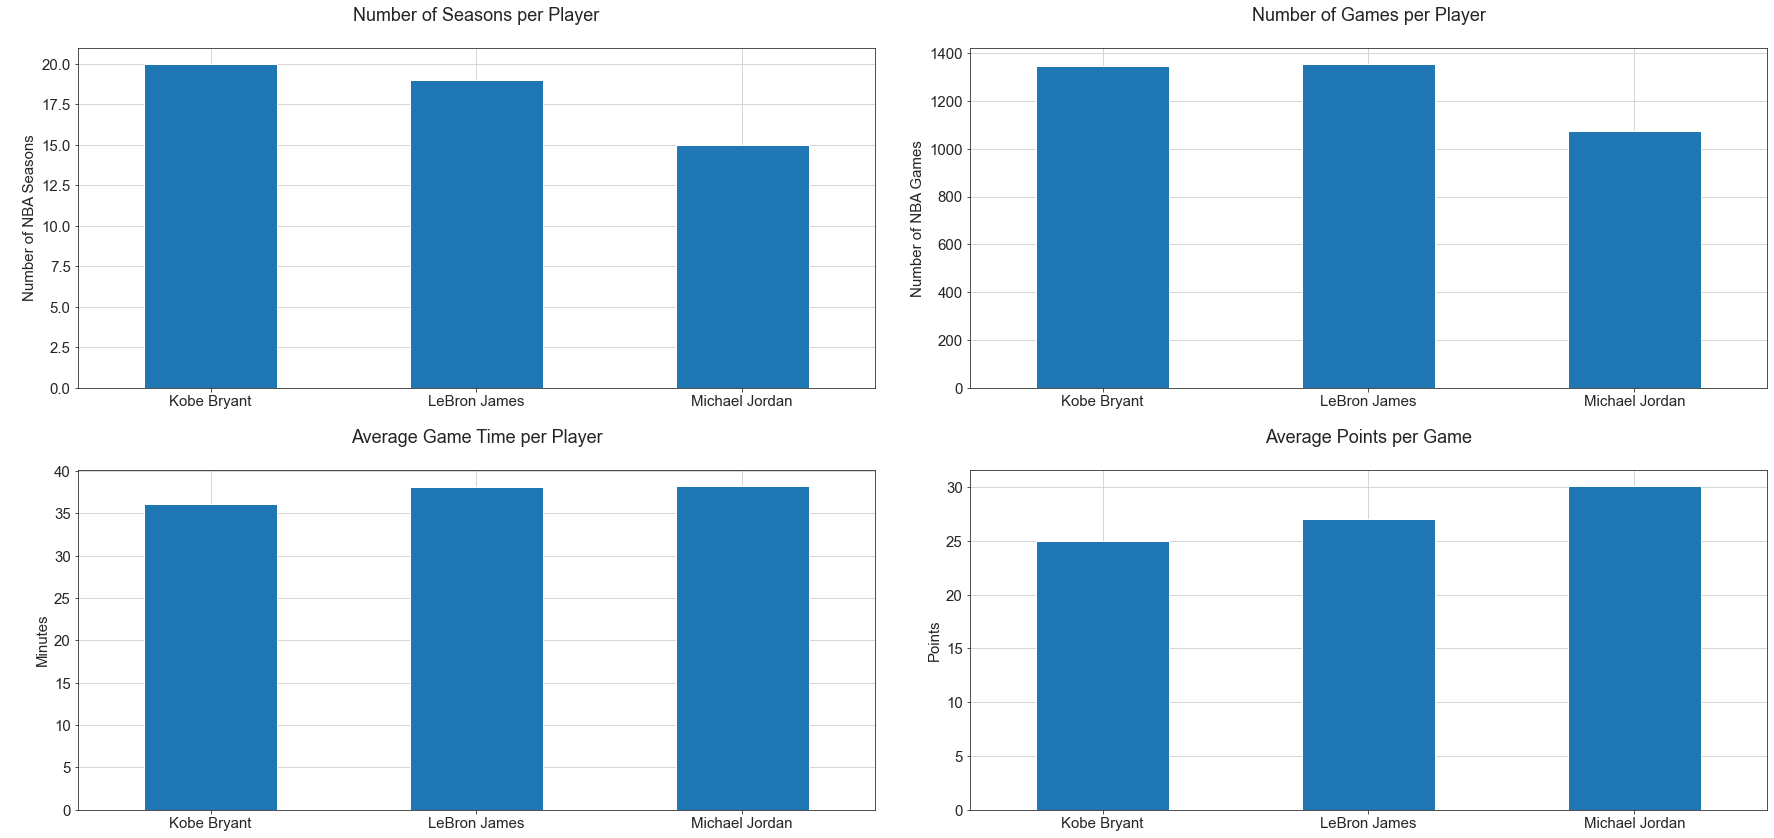

In [10]:
#create figure
fig = plt.figure(figsize = (25,12))
plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("ticks",{'axes.grid' : True})

#subplot positions
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

#subplots
summary['No. of Seasons'].plot(kind = 'bar', ax = ax0, fontsize = 15, rot = 360)
summary['No. of Games'].plot(kind = 'bar', ax = ax1, fontsize = 15, rot = 360)
summary['Average Game Time (minutes)'].plot(kind = 'bar', ax = ax2, fontsize = 15, rot = 360)
summary['Average Game Points'].plot(kind = 'bar', ax = ax3, fontsize = 15, rot = 360)

#set labels
ax0.set_title('Number of Seasons per Player\n', fontsize = 18)
ax0.set_ylabel('\nNumber of NBA Seasons', fontsize = 15)
ax0.set_xlabel('')

ax1.set_title('Number of Games per Player\n', fontsize = 18)
ax1.set_ylabel('\nNumber of NBA Games', fontsize = 15)
ax1.set_xlabel('')

ax2.set_title('Average Game Time per Player\n', fontsize = 18)
ax2.set_ylabel('\nMinutes', fontsize = 15)
ax2.set_xlabel('')

ax3.set_title('Average Points per Game\n', fontsize = 18)
ax3.set_ylabel('\nPoints', fontsize = 15)
ax3.set_xlabel('')

#show plot
fig.tight_layout(pad = 2.0)

<h1 style="background-color:rgba(202, 204, 206, 0.5);"> </h1>

### Distribution of the each players' points per game

#### NOT NORMALIZED

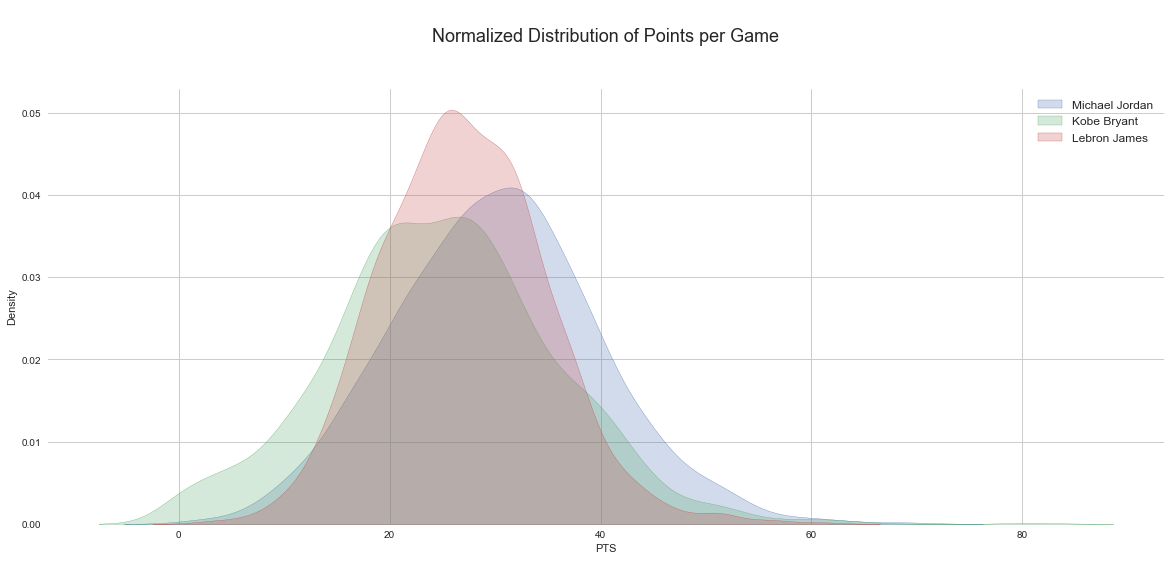

In [155]:
#KDE PLot

#create figure
fig, ax = plt.subplots(figsize=(20,8))
plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("ticks",{'axes.grid' : True})

#plot the data
ax = sns.kdeplot(data = mj_points, x = 'PTS', shade = True, )
ax1 = sns.kdeplot(data = kb_points, x = 'PTS', ax = ax, shade = True)
ax2 = sns.kdeplot(data = lj_points, x = 'PTS', ax = ax,shade = True)

#set legends
ax.set_title('\nNormalized Distribution of Points per Game\n\n', fontsize = 18)
ax.legend(['Michael Jordan', 'Kobe Bryant', 'Lebron James'], loc='upper right', fontsize='12')

#show plot
plt.show()

In [139]:
print('STATISTICS:')
print(f"MJ Mean: {round(mj_points['PTS'].mean(),2)}, MJ Standard Deviation: {round(mj_points['PTS'].std(),2)}")
print(f"LJ Mean: {round(lj_points['PTS'].mean(),2)}, LJ Standard Deviation: {round(lj_points['PTS'].std(),2)}")
print(f"KB Mean: {round(kb_points['PTS'].mean(),2)}, KB Standard Deviation: {round(kb_points['PTS'].std(),2)}")

STATISTICS:
MJ Mean: 30.12, MJ Standard Deviation: 9.75
LJ Mean: 27.06, LJ Standard Deviation: 7.75
KB Mean: 24.99, KB Standard Deviation: 10.72


<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<text> **NOT NORMALIZED DATA** <text/>    
    <br>
<text> Based on the distribution plot, **Kobe Bryant** and **Lebron James'** scores are lower than **Michael Jordan**. <br> However, the `standard deviation`  measure suggests that **Lebron James'** scores are more consistent than **Kobe Bryant** and even **Michael Jordan**<text/> <br> <br> **Lebron James'** scores has a  standard deviation of `7.75 points from the mean which is 27.06 points per game`
<br>
Meanwhile, Michael Jordan and Kobe Bryant has a standard deviation of `9.75 points` and `10.72 points` respectively 
</div>

#### NORMALIZED

In [142]:
#Normalize the Data

#Michael Jordan
mj_std = np.std(mj_points['PTS'])
mj_mean = np.mean(mj_points['PTS'])
mj_domain = np.linspace(np.min(mj_points['PTS']), np.max(mj_points['PTS']))

mj_norm = norm.pdf(mj_domain, mj_mean, mj_std)
mj_domain_norm = np.linspace(np.min(mj_norm), np.max(mj_norm))


#Lebron James
lj_std = np.std(lj_points['PTS'])
lj_mean = np.mean(lj_points['PTS'])
lj_domain = np.linspace(np.min(lj_points['PTS']), np.max(lj_points['PTS']))

lj_norm = norm.pdf(lj_domain, lj_mean, lj_std)
lj_domain_norm = np.linspace(np.min(lj_norm), np.max(lj_norm))

#Kobe Bryant
kb_std = np.std(kb_points['PTS'])
kb_mean = np.mean(kb_points['PTS'])
kb_domain = np.linspace(np.min(kb_points['PTS']), np.max(kb_points['PTS']))

kb_norm = norm.pdf(kb_domain, kb_mean, kb_std)
kb_domain_norm = np.linspace(np.min(kb_norm), np.max(kb_norm))
                   

#### NORMALIZED DISTRIBUTION PLOT 
<br>
<code>Not Normalized POINTS as x-axis<code/>

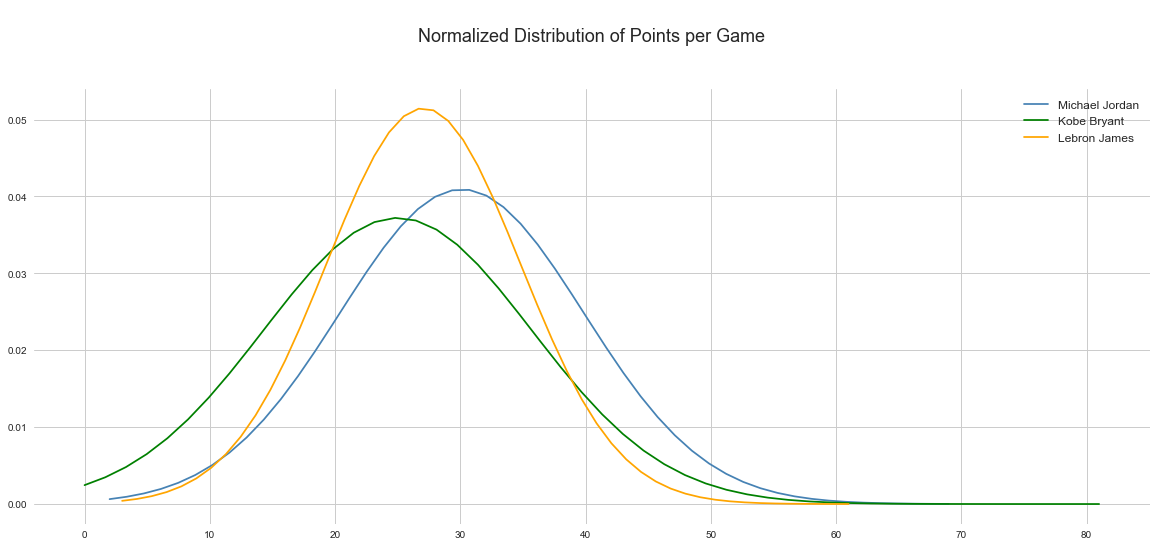

In [153]:
#create figure
fig, ax = plt.subplots(figsize=(20,8))
plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("ticks",{'axes.grid' : True})


#plot the normalized data
ax0 = plt.plot(mj_domain, norm.pdf(mj_domain, mj_mean, mj_std), color = 'steelblue')
ax1 = plt.plot(kb_domain, norm.pdf(kb_domain, kb_mean, kb_std), color = 'green')
ax2 = plt.plot(lj_domain, norm.pdf(lj_domain, lj_mean, lj_std), color = 'orange')

#set legends
ax.set_title('\nNormalized Distribution of Points per Game\n\n', fontsize = 18)
ax.legend(['Michael Jordan', 'Kobe Bryant', 'Lebron James'], loc='upper right', fontsize='12')

plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<text> **NORMALIZED DATA** <text/>    
    <br>
<text> The observation from this plot is same with that of the unnormalized data. <br> The only difference is that the lines in this plot are more smoothed out and the consistency of scores are becoming more obvious.
</div>

#### NORMALIZED DISTRIBUTION PLOT 
<br>
<code>Normalized POINTS as x-axis<code/>

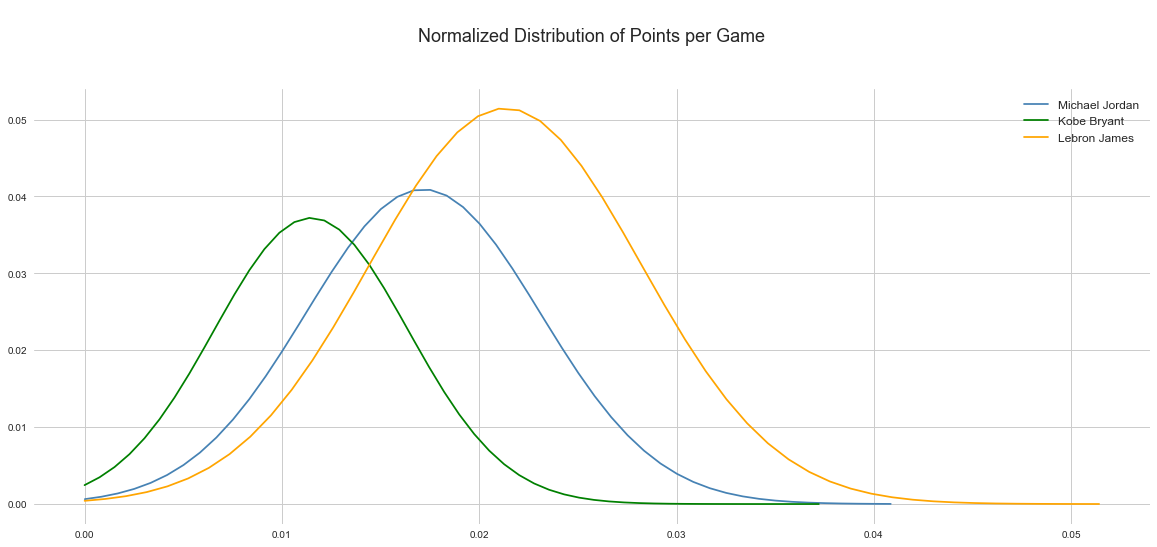

In [154]:
#create figure
fig, ax = plt.subplots(figsize=(20,8))
plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("ticks",{'axes.grid' : True})


#plot the normalized data
ax0 = plt.plot(mj_domain_norm, mj_norm, color = 'steelblue')
ax1 = plt.plot(kb_domain_norm, kb_norm, color = 'green')
ax2 = plt.plot(lj_domain_norm, lj_norm, color = 'orange')

#set legends
ax.set_title('\nNormalized Distribution of Points per Game\n\n', fontsize = 18)
ax.legend(['Michael Jordan', 'Kobe Bryant', 'Lebron James'], loc='upper right', fontsize='12')

plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<text> **NORMALIZED DATA** <text/>    
    <br>
<text> For this plot, I also used the normalized data except that I also used the normalized data point in the x-axis. <br> It can be observed that the distribution for `Lebron James'` scores have become wider and the consistency became more apparent
</div>

## CONCLUSION

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
<text> **NORMALIZED DATA** <text/>    
    <br>
<text> In this study we have explored the score distribution of the three most popular NBA Players. <br> After performing the visualizations, statistical tests and normalizations, we can conclude that `Lebron James` is indeed better than Michael Jordan and Kobe Bryant in terms of scoring.<br>
    <br>
But if your're a fan of either `Kobe Bryant` or `Michael Jordan`, don't cry just yet as we have yet to explore the other game statistics (steal, rebound, etc). <br> Who knows, maybe `Kobe` or `Jordan` will outperform `Lebron` in those departments ヅ
<br>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
<text> **SEE YOU NEXT PROJECT!** <text/>    